In [46]:
import torch
import torchvision
import torchaudio
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import librosa
import librosa.display
import numpy as np
from PIL import Image
from IPython.display import Audio, display


In [13]:
print("PyTorch Version: " + torch.__version__)
print("Cuda: " + str(torch.cuda.is_available()))
print("Torchvision Version: " + torchvision.__version__)
print("Torchaudio Version: " + torchaudio.__version__)

PyTorch Version: 1.9.1+cu111
Cuda: True
Torchvision Version: 0.10.1+cu111
Torchaudio Version: 0.9.1


In [98]:
data_path = "../data"
normal_example = os.path.join(data_path, 'pump', 'id_00', 'normal', '00000000.wav')
abnormal_example = os.path.join(data_path, 'pump', 'id_00', 'abnormal', '00000000.wav')

In [104]:
normal_audio_signal, sample_rate = torchaudio.load(normal_example)
abnormal_audio_signal, sample_rate= torchaudio.load(abnormal_example)

In [108]:
#function from torchaudio examples
def print_stats(waveform, sample_rate=None, src=None):
  if src:
    print("-" * 10)
    print("Source:", src)
    print("-" * 10)
  if sample_rate:
    print("Sample Rate:", sample_rate)
  print("Shape:", tuple(waveform.shape))
  print("Dtype:", waveform.dtype)
  print(f" - Max:     {waveform.max().item():6.3f}")
  print(f" - Min:     {waveform.min().item():6.3f}")
  print(f" - Mean:    {waveform.mean().item():6.3f}")
  print(f" - Std Dev: {waveform.std().item():6.3f}")
  print()
  print(waveform)
  print()

In [109]:
print_stats(normal_audio_signal, sample_rate=sample_rate)

Sample Rate: 16000
Shape: (8, 160000)
Dtype: torch.float32
 - Max:      0.091
 - Min:     -0.084
 - Mean:    -0.000
 - Std Dev:  0.012

tensor([[ 0.0137,  0.0059, -0.0037,  ..., -0.0046,  0.0170,  0.0174],
        [ 0.0114,  0.0038,  0.0015,  ...,  0.0103,  0.0238,  0.0157],
        [ 0.0011,  0.0106,  0.0178,  ...,  0.0143,  0.0243,  0.0145],
        ...,
        [-0.0119, -0.0035,  0.0280,  ...,  0.0027, -0.0020, -0.0016],
        [ 0.0099, -0.0003,  0.0074,  ...,  0.0068, -0.0022, -0.0009],
        [ 0.0106,  0.0116, -0.0031,  ..., -0.0065, -0.0004,  0.0171]])



In [110]:
print_stats(abnormal_audio_signal, sample_rate=sample_rate)

Sample Rate: 16000
Shape: (8, 160000)
Dtype: torch.float32
 - Max:      0.127
 - Min:     -0.116
 - Mean:    -0.000
 - Std Dev:  0.014

tensor([[-0.0153, -0.0145, -0.0093,  ..., -0.0206, -0.0129, -0.0064],
        [-0.0193, -0.0099, -0.0094,  ..., -0.0116, -0.0132, -0.0030],
        [-0.0126, -0.0061, -0.0077,  ...,  0.0007, -0.0031, -0.0053],
        ...,
        [-0.0082, -0.0106, -0.0106,  ..., -0.0153, -0.0090, -0.0069],
        [-0.0123, -0.0076, -0.0062,  ..., -0.0189, -0.0156, -0.0070],
        [-0.0125, -0.0112, -0.0099,  ..., -0.0215, -0.0143, -0.0013]])



Text(0.5, 1.0, 'Normal and Abnormal Sound Signal')

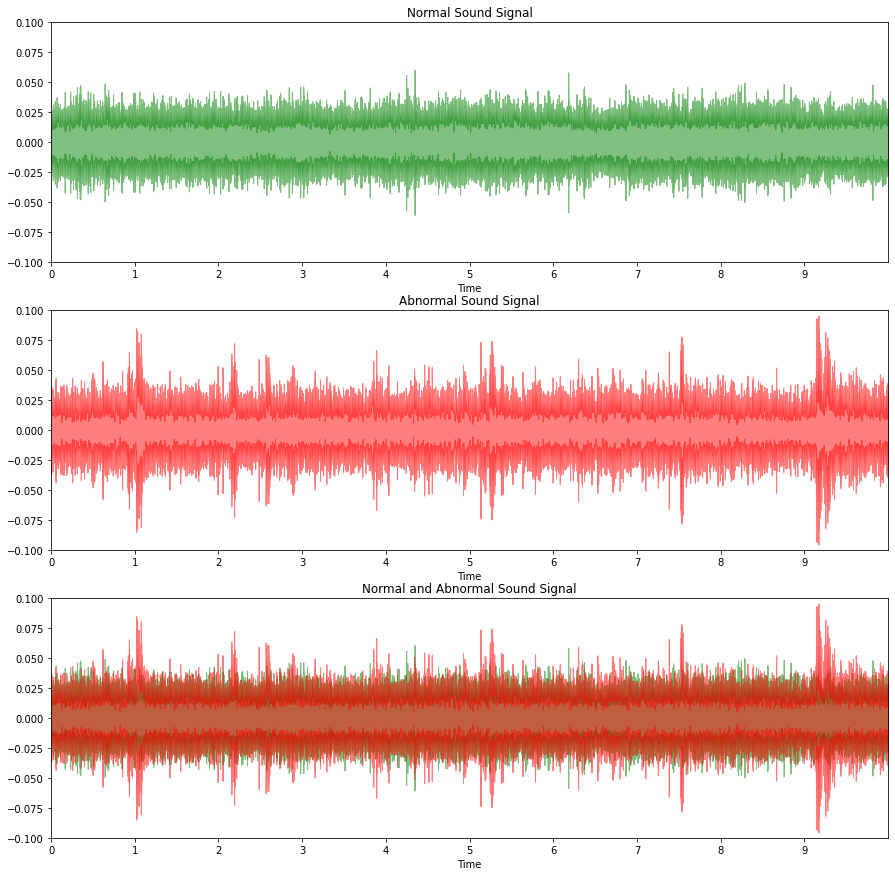

In [97]:
fig = plt.figure(figsize=(15, 15))

ax1 = plt.subplot(3,1,1)
ax1.set_ylim([-0.1,0.1])
librosa.display.waveplot(normal_audio_signal[0].cpu().detach().numpy(), sr = sample_rate, alpha = 0.5, color="green")
plt.title('Normal Sound Signal')

ax2 = plt.subplot(3,1,2)
ax2.set_ylim([-0.1,0.1])
librosa.display.waveplot(abnormal_audio_signal[0].cpu().detach().numpy(), sr=sample_rate, alpha=0.5, color="red")
plt.title('Abnormal Sound Signal')

ax3 = plt.subplot(3,1,3)
ax3.set_ylim([-0.1,0.1])
librosa.display.waveplot(normal_audio_signal[0].cpu().detach().numpy(), sr=sample_rate, alpha=0.5, color="green", label='Abnormal signal')
librosa.display.waveplot(abnormal_audio_signal[0].cpu().detach().numpy(), sr=sample_rate, alpha=0.5, color="red", label='Normal signal')
plt.title('Normal and Abnormal Sound Signal')